In [1]:
pip install azure-cognitiveservices-vision-customvision

Note: you may need to restart the kernel to use updated packages.


In [1]:
project_id = '99324b3f-25eb-4ea2-afec-b6ce60618115' 
cv_key = '31f4ff6813104eef91a11787057e8dbf' 
cv_endpoint = 'https://mycst123-prediction.cognitiveservices.azure.com/' 
model_name = 'detect-produce' 
print('Ready to predict using model {} in project {}'.format(model_name, project_id))

Ready to predict using model detect-produce in project 99324b3f-25eb-4ea2-afec-b6ce60618115


In [2]:
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from msrest.authentication import ApiKeyCredentials
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import os
%matplotlib inline

In [9]:
test_img_file = os.path.join('images 2.jpg')
test_img = Image.open(test_img_file)
test_img_h, test_img_w, test_img_ch = np.array(test_img).shape


In [10]:
credentials = ApiKeyCredentials(in_headers={"Prediction-key": cv_key})
predictor = CustomVisionPredictionClient(endpoint=cv_endpoint, credentials=credentials)

print('Detecting objects in {} using model {} in project {}...'.format(test_img_file, model_name, project_id))

Detecting objects in images 2.jpg using model detect-produce in project 99324b3f-25eb-4ea2-afec-b6ce60618115...


In [11]:
with open(test_img_file , mode='rb') as test_data:
    results = predictor.detect_image(project_id, model_name, test_data)

(0.0, 1.0, 0.0, 1.0)

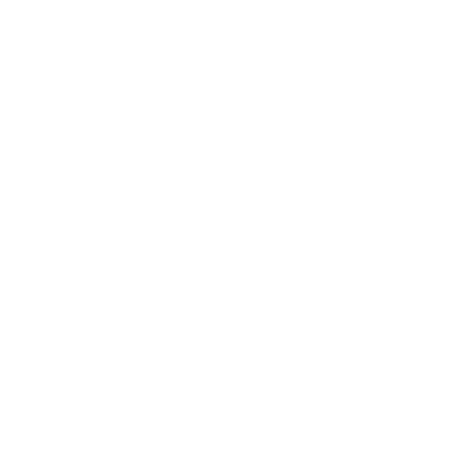

In [14]:
fig = plt.figure(figsize=(8, 8))
plt.axis('off')

In [16]:
draw = ImageDraw.Draw(test_img)
lineWidth = int(np.array(test_img).shape[1]/100)
object_colors = {
    "stop": "red",
    "30": "yellow",
    "80": "orange"
}

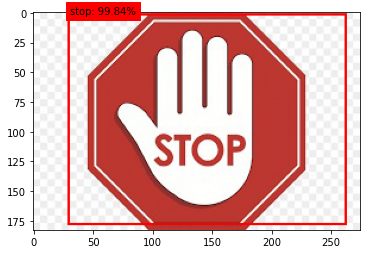

In [19]:
for prediction in results.predictions:
    color = 'white' # default for 'other' object tags
    if (prediction.probability*100) > 50:
        if prediction.tag_name in object_colors:
            color = object_colors[prediction.tag_name]
        left = prediction.bounding_box.left * test_img_w 
        top = prediction.bounding_box.top * test_img_h 
        height = prediction.bounding_box.height * test_img_h
        width =  prediction.bounding_box.width * test_img_w
        points = ((left,top), (left+width,top), (left+width,top+height), (left,top+height),(left,top))
        draw.line(points, fill=color, width=lineWidth)
        plt.annotate(prediction.tag_name + ": {0:.2f}%".format(prediction.probability * 100),(left,top), backgroundcolor=color)
plt.imshow(test_img)
